In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
dsE = xr.open_dataset('/Users/zcaspar/codes/diags/Estats.nc')

In [3]:
dsE = dsE.assign_coords({'y_rho':dsE.y_rho*1e-3})

In [8]:
dsE

<xarray.Dataset>
Dimensions:       (y_rho: 145, x_rho: 52)
Coordinates:
  * y_rho         (y_rho) float32 0.0 20.0 40.0 ... 2.84e+03 2.86e+03 2.88e+03
    y_u           (y_rho) float32 -2e+03 1.8e+04 3.8e+04 ... 2.858e+06 2.878e+06
    s_rho_slice0  float32 -0.01
    x_v           (x_rho) float32 -2e+03 1.8e+04 3.8e+04 ... 9.98e+05 1.018e+06
    f_rho         (y_rho) float32 0.000103 0.0001033 ... 0.0001493 0.0001496
    f_u           (y_rho) float32 0.000103 0.0001033 ... 0.0001493 0.0001496
  * x_rho         (x_rho) float32 0.0 2e+04 4e+04 ... 9.8e+05 1e+06 1.02e+06
Data variables:
    u_mean        (y_rho, x_rho) float32 -8.071e-05 -6.402e-05 ... 0.0004386
    v_mean        (y_rho, x_rho) float32 1.478e-05 8.608e-06 ... 3.17e-05
    KE_mean       (y_rho, x_rho) float32 0.01058 0.01063 ... 0.008678 0.008857
    usq_mean      (y_rho, x_rho) float32 2.92e-05 2.931e-05 ... 5.385e-05
    vsq_mean      (y_rho, x_rho) float32 9.471e-05 9.557e-05 ... 4.691e-05

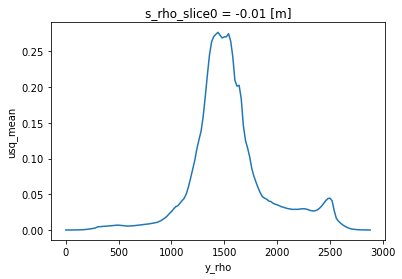

In [9]:
dsE.usq_mean.mean('x_rho').plot()

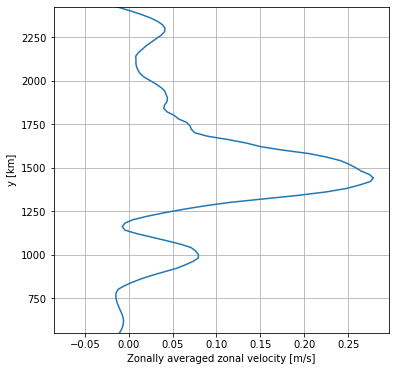

In [5]:
plt.figure(figsize=(6,6))
dsE.u_mean.mean('x_rho').plot(y='y_rho')
plt.title('');plt.ylim(550,2425);
plt.grid()

plt.xlabel('Zonally averaged zonal velocity [m/s]');plt.ylabel('y [km]')
plt.savefig('/Users/zcaspar/Documents/Defense_figures/umean.pdf')

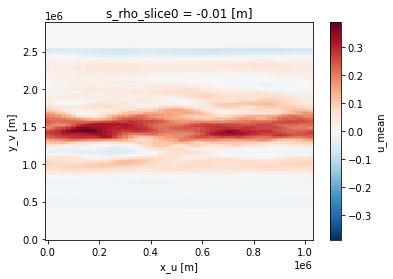

In [31]:
dsE.u_mean.plot()

In [11]:
x = np.arange(0,100,0.25)
y = np.arange(0,100,0.25)
t = np.arange(0,10+1/24,1/24)
X,Y = np.meshgrid(x,y)

In [12]:
L,omega = 20,1
rad= 2*np.pi
U = 10
c = rad*omega/(rad/L)
dt = 1/24

In [6]:
### Scheme coehrent/incoherent

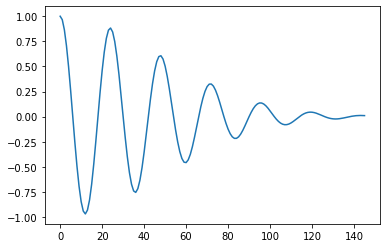

In [7]:
plt.plot(np.cos(rad*omega*np.arange(0,3+1/48,1/48))*np.exp(-np.arange(0,3+1/48,1/48)**2/(2*1)))

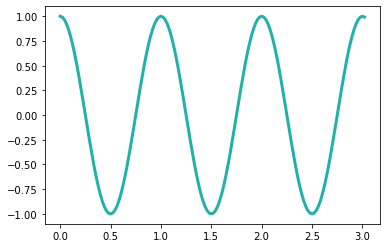

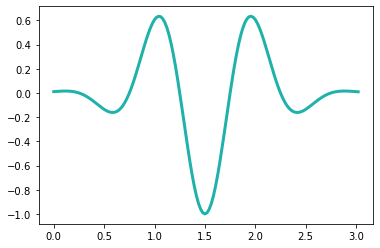

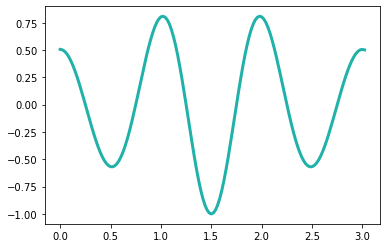

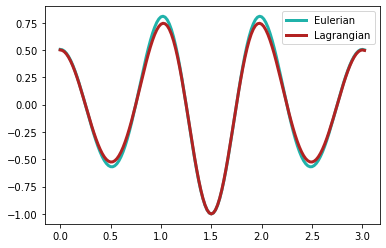

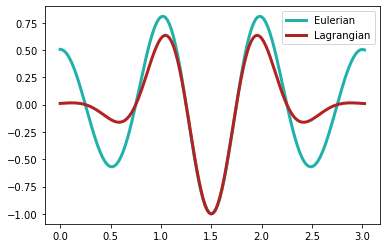

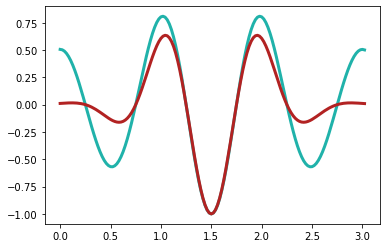

In [24]:
signal_coh = np.exp(-1j*rad*omega*np.arange(0,3+1/48,1/48))
signal_inc = np.exp(-1j*rad*(omega)*np.arange(0,3+1/48,1/48))*np.exp(-(np.arange(0,3+1/48,1/48)-1.5)**2/(2*0.25))
signal_small_inc = np.exp(-1j*rad*(omega*np.arange(0,3+1/48,1/48)+10))*np.exp(-(np.arange(0,3+1/48,1/48)-1.5)**2/(2*0.5))

plt.plot(np.arange(0,3+1/48,1/48),np.real(signal_coh),c='lightseagreen',linewidth=3)
plt.savefig('/Users/zcaspar/Documents/Defense_figures/coherent.png')
plt.figure()
plt.plot(np.arange(0,3+1/48,1/48),np.real(signal_inc),c='lightseagreen',linewidth=3)
plt.savefig('/Users/zcaspar/Documents/Defense_figures/incoherent.png')

plt.figure()
plt.plot(np.arange(0,3+1/48,1/48),np.real(signal_coh/2+signal_inc/2),c='lightseagreen',linewidth=3)
plt.savefig('/Users/zcaspar/Documents/Defense_figures/mixed.png')

plt.figure()
plt.plot(np.arange(0,3+1/48,1/48),np.real(signal_coh/2+signal_inc/2),c='lightseagreen',linewidth=3,label='Eulerian')
plt.plot(np.arange(0,3+1/48,1/48),np.real(signal_coh/2+signal_inc*np.exp(-(np.arange(0,3+1/48,1/48)-1.5)**2/(2*0.5))/2)
         ,c='firebrick',linewidth=3,label='Lagrangian')
plt.legend()
plt.savefig('/Users/zcaspar/Documents/Defense_figures/noapparent_inc.png')

plt.figure()
plt.plot(np.arange(0,3+1/48,1/48),np.real(signal_coh/2+signal_inc/2),c='lightseagreen',linewidth=3,label='Eulerian')
plt.plot(np.arange(0,3+1/48,1/48),np.real(signal_inc),c='firebrick',linewidth=3,label='Lagrangian')
plt.legend()
plt.savefig('/Users/zcaspar/Documents/Defense_figures/apparent_inc.png')

plt.figure()
plt.plot(np.arange(0,3+1/48,1/48),np.real(signal_coh/2+signal_inc/2),c='lightseagreen',linewidth=3,label='Eulerian')
plt.plot(np.arange(0,3+1/48,1/48),np.real(signal_inc),c='firebrick',linewidth=3,label='Lagrangian')
plt.savefig('/Users/zcaspar/Documents/Defense_figures/apparent_inc_logo.png')

In [40]:
from scipy.fftpack import fft
signal_inc0 = np.exp(-1j*rad*omega*np.linspace(0,10,1000))*np.exp(-(np.linspace(0,10,1000)-1.5)**2/(2*0.25))
signal_inc0 = np.exp(-1j*rad*omega*np.linspace(0,10,1000))*np.exp(-(np.linspace(0,10,1000)-1.5)**2/(2*0.25))


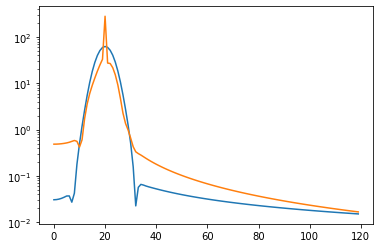

In [41]:

plt.plot(np.abs(fft(np.real(signal_inc)))[:t.size//2])
plt.plot(np.abs(fft(np.real(signal_coh/2+signal_inc/2)))[:t.size//2])
plt.yscale('log')

In [5]:
_ds = xr.Dataset(data_vars={'time':t,'x':x,'y':y})

In [6]:
#gaussian
ds_var = (1*np.cos(rad*omega*_ds.time)*np.exp(-((_ds.x-50)**2+(_ds.y-50)**2)/(2*L**2)))

#IT 1D:
#ds_var = (np.cos(rad(omega*_ds.time-1/L*_ds.x))).expand_dims({"y":_ds.y.size}).assign_coords({'y':_ds.y})
#ds_var = (c*np.cos(rad/L*_ds.x)).expand_dims({"y":_ds.y.size}).assign_coords({'y':_ds.y})
#ds_var = (np.cos(rad*(1/L*_ds.x-omega*_ds.time))).expand_dims({"y":_ds.y.size}).assign_coords({'y':_ds.y})
#ds_var = (np.exp(i*rad*(1/L*_ds.x-omega*_ds.time))).expand_dims({"y":_ds.y.size}).assign_coords({'y':_ds.y})

In [7]:
ds_var#.sel(x=0,y=50).plot()
#ds_var.sel(x=0,y=50).plot()

<xarray.DataArray (time: 241, x: 400, y: 400)>
array([[[0.00193045, 0.00199158, 0.00205432, ..., 0.0021187 ,
         0.00205432, 0.00199158],
        [0.00199158, 0.00205464, 0.00211936, ..., 0.00218578,
         0.00211936, 0.00205464],
        [0.00205432, 0.00211936, 0.00218612, ..., 0.00225464,
         0.00218612, 0.00211936],
        ...,
        [0.0021187 , 0.00218578, 0.00225464, ..., 0.0023253 ,
         0.00225464, 0.00218578],
        [0.00205432, 0.00211936, 0.00218612, ..., 0.00225464,
         0.00218612, 0.00211936],
        [0.00199158, 0.00205464, 0.00211936, ..., 0.00218578,
         0.00211936, 0.00205464]],

       [[0.00186468, 0.00192372, 0.00198432, ..., 0.00204651,
         0.00198432, 0.00192372],
        [0.00192372, 0.00198463, 0.00204715, ..., 0.0021113 ,
         0.00204715, 0.00198463],
        [0.00198432, 0.00204715, 0.00211163, ..., 0.00217781,
         0.00211163, 0.00204715],
...
        [0.00204651, 0.0021113 , 0.00217781, ..., 0.00224607,
         0.00217781, 0.0021113 ],
        [0.00198432, 0.00204715, 0.00211163, ..., 0.00217781,
         0.00211163, 0.00204715],
        [0.00192372, 0.00198463, 0.00204715, ..., 0.0021113 ,
         0.00204715, 0.00198463]],

       [[0.00193045, 0.00199158, 0.00205432, ..., 0.0021187 ,
         0.00205432, 0.00199158],
        [0.00199158, 0.00205464, 0.00211936, ..., 0.00218578,
         0.00211936, 0.00205464],
        [0.00205432, 0.00211936, 0.00218612, ..., 0.00225464,
         0.00218612, 0.00211936],
        ...,
        [0.0021187 , 0.00218578, 0.00225464, ..., 0.0023253 ,
         0.00225464, 0.00218578],
        [0.00205432, 0.00211936, 0.00218612, ..., 0.00225464,
         0.00218612, 0.00211936],
        [0.00199158, 0.00205464, 0.00211936, ..., 0.00218578,
         0.00211936, 0.00205464]]])
Coordinates:
  * time     (time) float64 0.0 0.04167 0.08333 0.125 ... 9.875 9.917 9.958 10.0
  * x        (x) float64 0.0 0.25 0.5 0.75 1.0 ... 98.75 99.0 99.25 99.5 99.75
  * y        (y) float64 0.0 0.25 0.5 0.75 1.0 ... 98.75 99.0 99.25 99.5 99.75

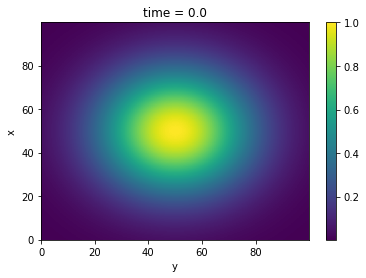

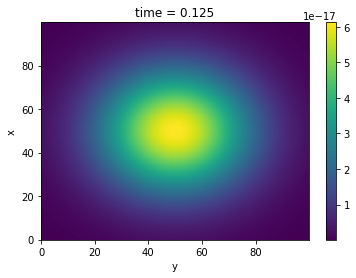

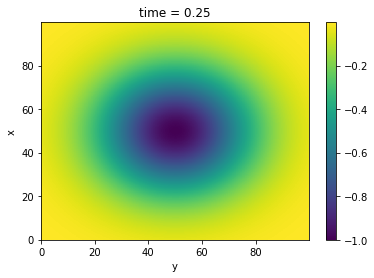

In [12]:
ds_var.isel(time=0).plot()
plt.figure()
ds_var.isel(time=int(3)).plot()
plt.figure()
ds_var.isel(time=int(0.25/dt)).plot()

In [8]:
ds = xr.Dataset({'IT':(['time','y','x'],ds_var.values)},coords={'time':t,'x':x,'y':y})

In [9]:
ds['low'] = U

ds['total'] = ds['low']+ds['IT']

In [10]:
dt = 1/24

x_adv,y_adv = 0, 0

In [11]:
x_adv,x_i = [0], 0
u_traj = np.array([ds['total'].sel(time=0,x=0,y=50).values])
for t in ds.time.values[1:]:
    x_adv.append(x_i+(ds['total'].sel(time=t,x=x_i,y=50,method='nearest')*dt).values)
    x_i = (x_i+(ds['total'].sel(time=t,x=x_i,y=50,method='nearest')*dt)).values
    u_traj = np.insert(u_traj,-1,ds['total'].sel(time=t,x=x_i,y=50,method='nearest').values)

In [12]:
u_traj = np.roll(u_traj,1)

In [13]:
dsL = xr.Dataset({'u':(['time'],u_traj),'x':(['time'],x_adv)},coords={'time':ds.time.values})

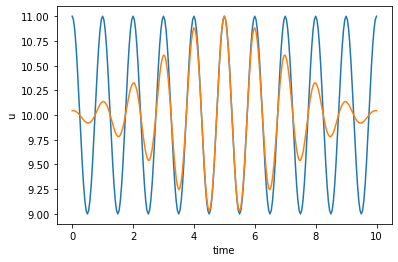

In [14]:
ds.total.sel(y=50,x=50).plot()
dsL.u.plot()

In [23]:
yi,xi=50,50
def gen_figs(it,savefig=False):
    name='%s'%it
    fig,ax = plt.subplots(1,2,figsize=(10,5))
    cs = ds['total'].isel(time=it).plot(cmap='RdBu_r',ax=ax[0], vmax=11,vmin=9,
                                        cbar_kwargs={'label':'Velocity'},zorder=-1)
    ax[0].plot(dsL['x'],np.full(ds.time.size,50),c='k',zorder=0);
    ax[0].scatter(xi,yi,s=100,c='lightseagreen',zorder=1);
    ax[0].scatter(dsL['x'].isel(time=it),50,s=100,c='firebrick',zorder=1)
    ax[0].set_title('Time = %s days'%np.around(ds['total'].isel(time=it).time.values,decimals=2))
    ds['total'].sel(x=xi,y=yi).plot(ax=ax[1],c='lightseagreen',label='Eulerian');
    dsL['u'].plot(ax=ax[1],c='firebrick',label='Lagrangian');
    ax[1].set_xlabel('Time [days]');ax[1].set_ylabel('Velocity'),ax[1].set_title('')
    ax[1].legend();ax[1].grid();ax[1].axvline(ds.isel(time=it).time,c='k');
    ax[1].set_ylim(9.,11)
    fig.tight_layout()
    if savefig:
        fig.savefig('/Users/zcaspar/Videos/Lagrangian_bias/'+name+'.jpg')
        plt.close()
#    return cs,cs_low,cs_hf

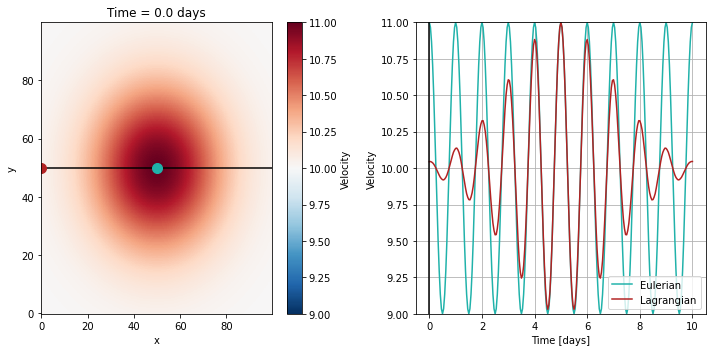

In [24]:
gen_figs(0)

In [25]:
for it in range(ds.time.size):
    gen_figs(it,savefig=True)